<a href="https://colab.research.google.com/github/Dohy-Lee/ML_DL.Basic/blob/main/8_2)Image_Classification_by_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input,test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
#입력이미지는 항상 깊이(채널)차원이 있어야 함. 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만, Conv2D 층을 사용하기 위해서 마지막에 이 채널 차원을 추가해야함
#(48000,28,28)크기인 train_input → (48000,28,28,1) 크기 train_scaled

In [16]:
model = keras.Sequential()
#합성곱 층은 32개의 필터 사용, 커널의 크기는 (3,3), 활성화 함수 렐루, 세임 패딩
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
#풀링층 추가
#특성맵의 크기는 2x2풀링에 의해 절반으로 줆. 합성곱층에서 32개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 32. 최대 풀링을 통과한 최종 특성 맵의크기는 (14,14,32)
model.add(keras.layers.MaxPooling2D(2))
#특성맵의 크기는 2x2풀링에 의해 절반으로 줆. 합성곱층에서 64개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 64. 최대 풀링을 통과한 최종 특성 맵의크기는 (7,7,64)
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

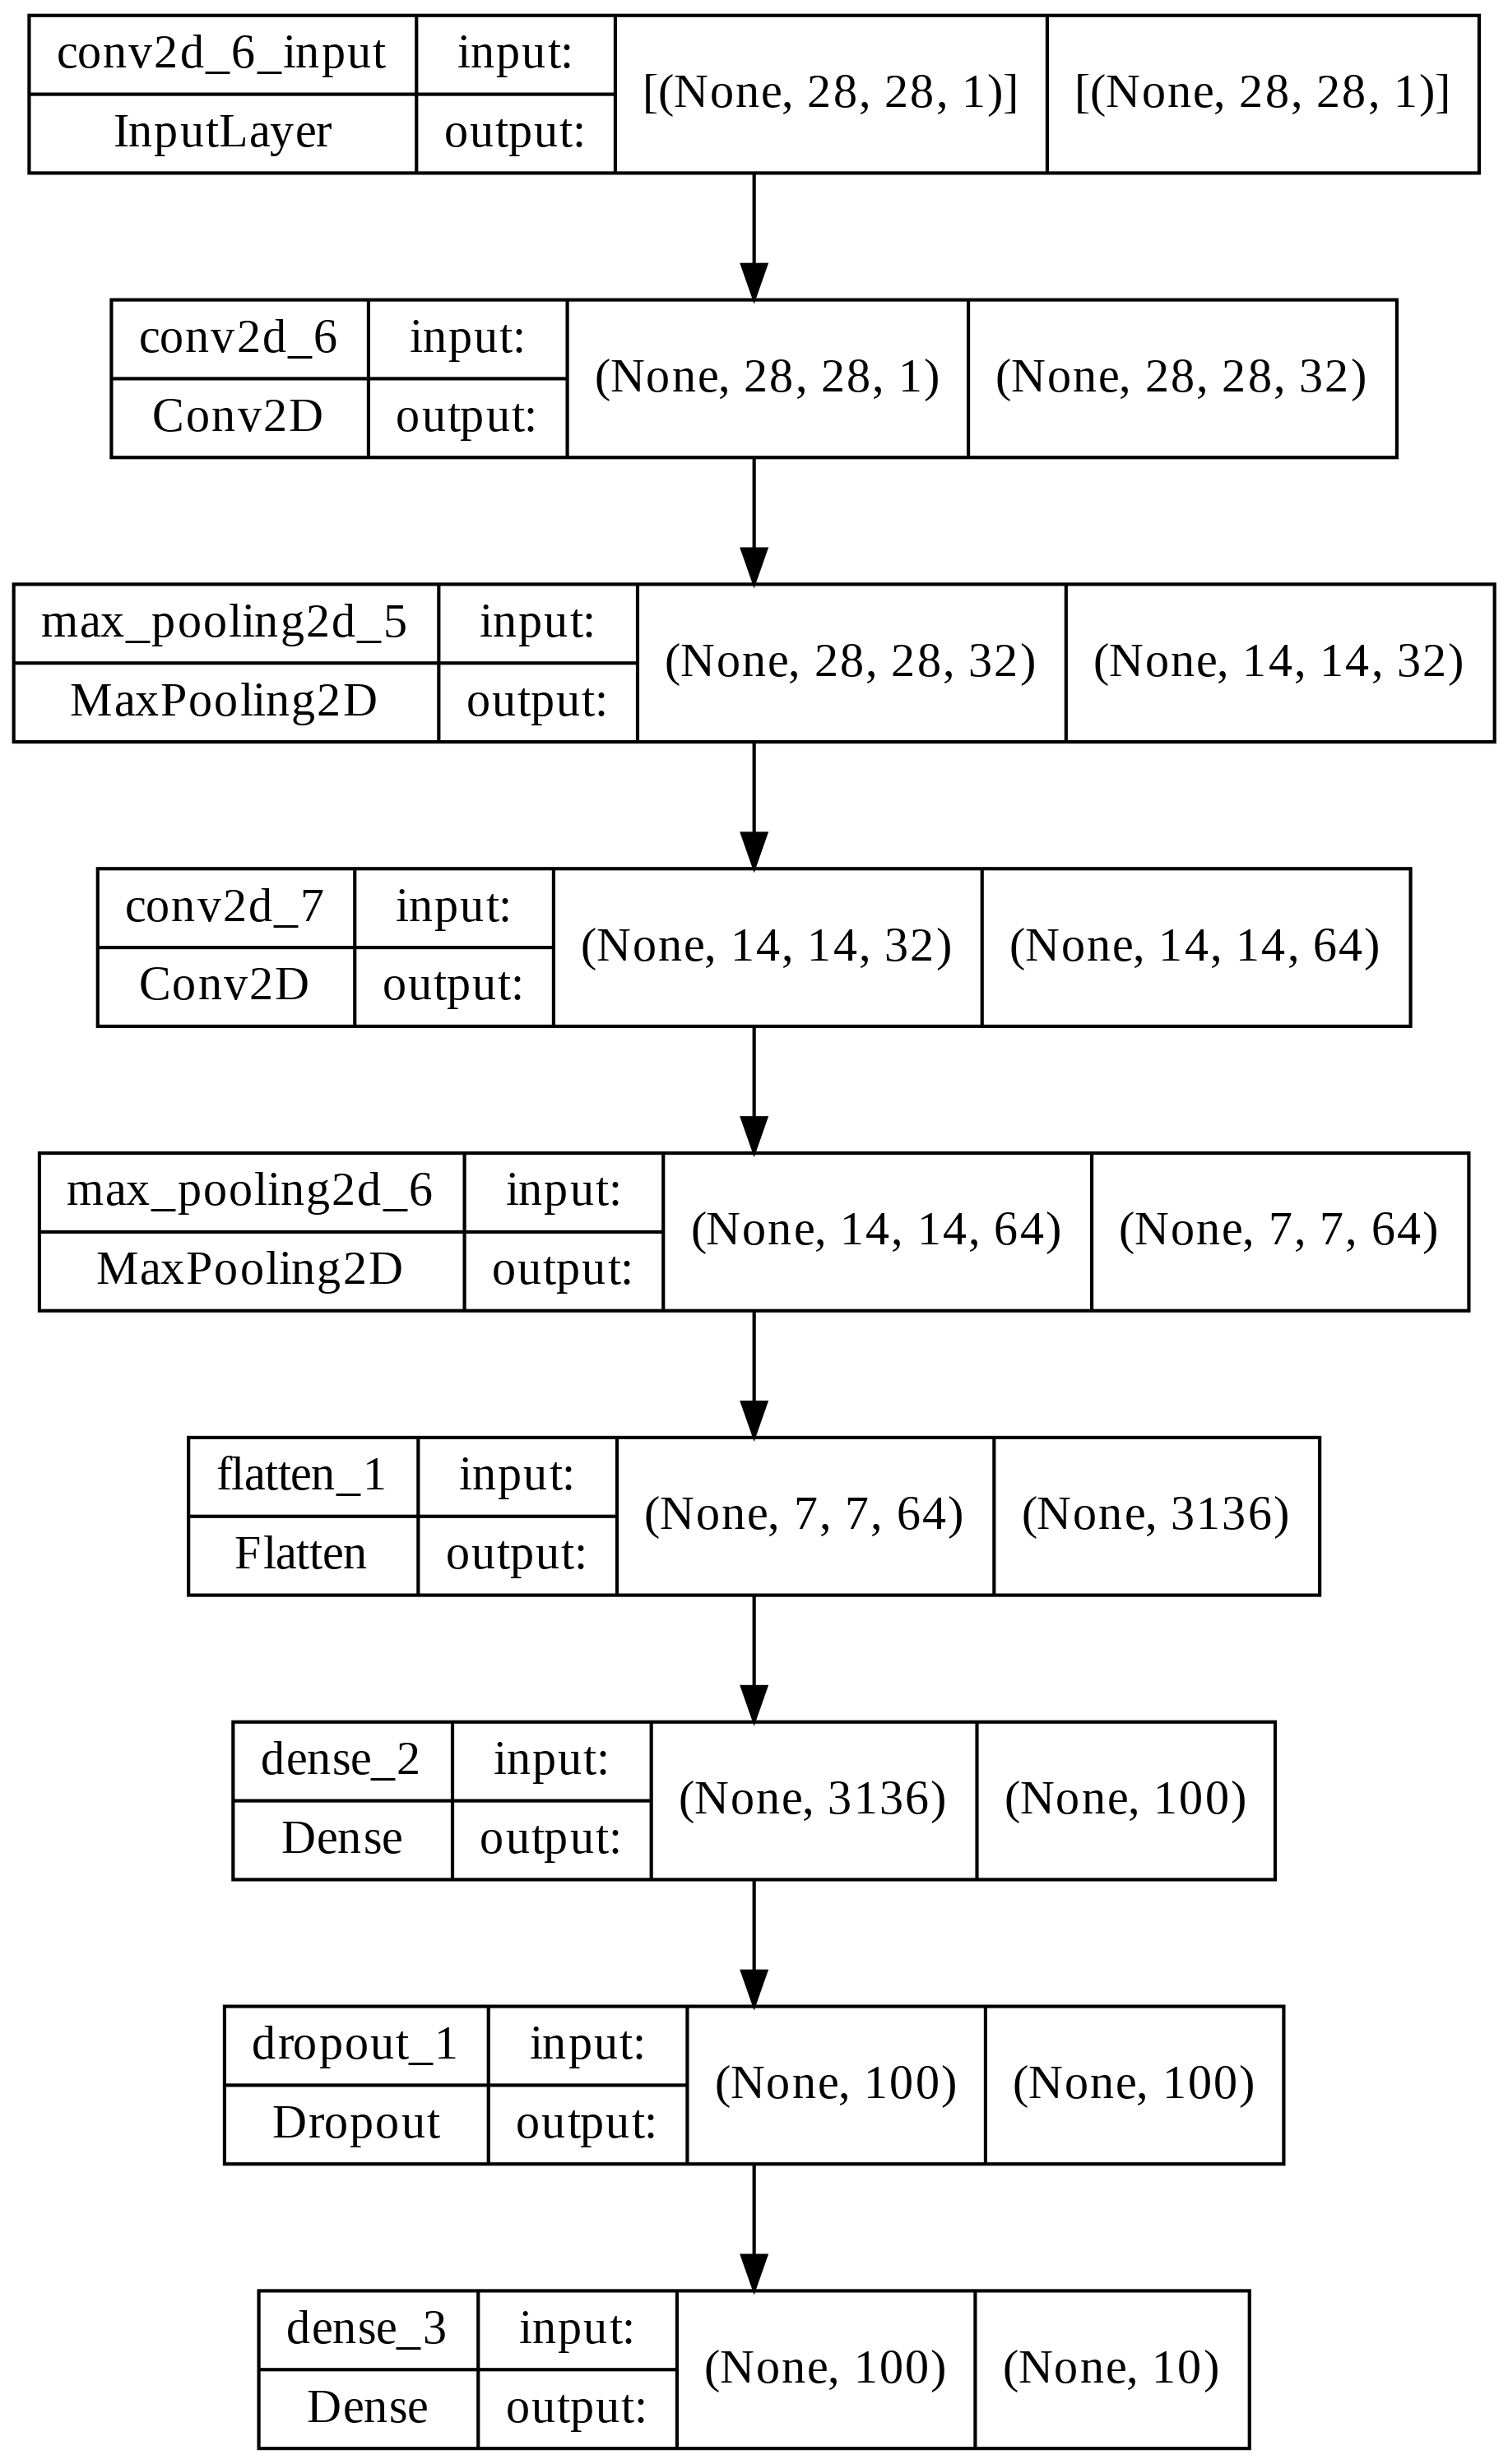

In [19]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecutre.png', dpi=300)

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2223 - accuracy: 0.9171 - val_loss: 0.2440 - val_accuracy: 0.9114
Epoch 2/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2047 - accuracy: 0.9228 - val_loss: 0.2533 - val_accuracy: 0.9111
Epoch 3/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.1894 - accuracy: 0.9295 - val_loss: 0.2242 - val_accuracy: 0.9186
Epoch 4/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.1792 - accuracy: 0.9324 - val_loss: 0.2238 - val_accuracy: 0.9214
Epoch 5/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1667 - accuracy: 0.9372 - val_loss: 0.2302 - val_accuracy: 0.9229
Epoch 6/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.1555 - accuracy: 0.9410 - val_loss: 0.2275 - val_accuracy: 0.9215


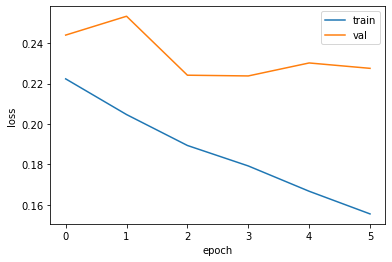

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()#특성맵의 크기는 2x2풀링에 의해 절반으로 줆. 합성곱층에서 32개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 32. 최대 풀링을 통과한 최종 특성 맵의크기는 (14,14,32))

In [25]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 12ms/step - loss: 0.2238 - accuracy: 0.9214


[0.2237877994775772, 0.9214166402816772]

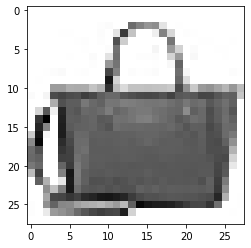

In [26]:
#matplotlib에서는 흑백 이미지에 깊이 차원이 없으므로 (28,28,1)을 (28,28)로 바꾸어 출력
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [27]:
preds = model.predict(val_scaled[0:1])
#슬라이싱을 사용한 이유 : 케라스의 fit,predict,evaluate 메소드는 모두 입력ㄷ의 첫 번째 차원이 배치 차원일 것으로 기대. 따라서 샘플 하나를 전달할 때에는 (28,28,1)이 아닌 (1,28,28,1)크기를 전달해야 함
#배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나더라도 전체 차원이 유지되므로 (1,28,28,1) 크기를 만듦
print(preds)

[[1.8030938e-23 8.3059009e-30 9.5969108e-28 2.8717248e-22 5.2990711e-27
  8.6528214e-17 3.8414674e-25 1.9758245e-20 1.0000000e+00 1.1180524e-21]]


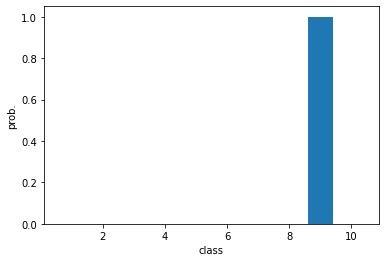

In [28]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [29]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [31]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.2436 - accuracy: 0.9182


[0.24364832043647766, 0.9182000160217285]